## <center>SLR using ANN on Height and Weight Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Heights and weights.csv')
data.head(5)

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  15 non-null     float64
 1   Weight  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [4]:
data.shape

(15, 2)

In [5]:
data.isnull().mean()*100

Height    0.0
Weight    0.0
dtype: float64

In [6]:
data.duplicated().sum()

0

### Splitting the data into train and test

In [7]:
x = data[['Height']].values
y = data[['Weight']].values

### Scaling x

In [8]:
sc = StandardScaler()

In [9]:
x = sc.fit_transform(x)

In [10]:
x

array([[-1.63705138],
       [-1.36521628],
       [-1.18399288],
       [-0.91215778],
       [-0.73093438],
       [-0.45909928],
       [-0.18726418],
       [-0.00604078],
       [ 0.26579432],
       [ 0.44701772],
       [ 0.71885282],
       [ 0.90007622],
       [ 1.17191132],
       [ 1.35313472],
       [ 1.62496982]])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

### Setting random seed for reproducibility

In [12]:
tf.random.set_seed(42)

### Define the model architecture

In [13]:
model = Sequential()

### Adding neuron and layers

In [14]:
model.add(Dense(64,activation = 'relu',input_dim = x_train.shape[1] ))
model.add(Dropout(0.2))
model.add(Dense(32,activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

### Compiling the model

In [15]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

### Define early stopping criteria

In [16]:
early_stopping = EarlyStopping(monitor='val_loss',patience = 50, verbose=1)

### Training the model with early stopping

In [17]:
history = model.fit(x_train,y_train,batch_size=2,callbacks=[early_stopping],epochs=4000,validation_data=(x_test,y_test))

Epoch 1/4000
6/6 [==============================] - 1s 32ms/step - loss: 3926.5627 - val_loss: 3837.7151
Epoch 2/4000
6/6 [==============================] - 0s 7ms/step - loss: 3912.2615 - val_loss: 3819.3242
Epoch 3/4000
6/6 [==============================] - 0s 7ms/step - loss: 3888.3499 - val_loss: 3802.8679
Epoch 4/4000
6/6 [==============================] - 0s 7ms/step - loss: 3884.2656 - val_loss: 3787.4062
Epoch 5/4000
6/6 [==============================] - 0s 6ms/step - loss: 3857.2454 - val_loss: 3772.6609
Epoch 6/4000
6/6 [==============================] - 0s 7ms/step - loss: 3850.9707 - val_loss: 3757.6746
Epoch 7/4000
6/6 [==============================] - 0s 7ms/step - loss: 3823.0520 - val_loss: 3741.7473
Epoch 8/4000
6/6 [==============================] - 0s 8ms/step - loss: 3811.4734 - val_loss: 3724.9407
Epoch 9/4000
6/6 [==============================] - 0s 6ms/step - loss: 3805.3906 - val_loss: 3706.2195
Epoch 10/4000
6/6 [==============================] - 0s 8ms/ste

6/6 [==============================] - 0s 7ms/step - loss: 143.5165 - val_loss: 70.3905
Epoch 81/4000
6/6 [==============================] - 0s 7ms/step - loss: 127.3592 - val_loss: 68.4836
Epoch 82/4000
6/6 [==============================] - 0s 6ms/step - loss: 124.6331 - val_loss: 66.6231
Epoch 83/4000
6/6 [==============================] - 0s 7ms/step - loss: 91.9065 - val_loss: 67.2361
Epoch 84/4000
6/6 [==============================] - 0s 6ms/step - loss: 148.6463 - val_loss: 70.8200
Epoch 85/4000
6/6 [==============================] - 0s 7ms/step - loss: 44.8791 - val_loss: 73.6732
Epoch 86/4000
6/6 [==============================] - 0s 6ms/step - loss: 158.9630 - val_loss: 76.5109
Epoch 87/4000
6/6 [==============================] - 0s 7ms/step - loss: 60.1509 - val_loss: 75.6341
Epoch 88/4000
6/6 [==============================] - 0s 6ms/step - loss: 105.8877 - val_loss: 75.9504
Epoch 89/4000
6/6 [==============================] - 0s 6ms/step - loss: 79.3712 - val_loss: 75.858

6/6 [==============================] - 0s 6ms/step - loss: 117.7013 - val_loss: 28.2291
Epoch 161/4000
6/6 [==============================] - 0s 6ms/step - loss: 99.1627 - val_loss: 29.6079
Epoch 162/4000
6/6 [==============================] - 0s 7ms/step - loss: 48.3306 - val_loss: 30.7478
Epoch 163/4000
6/6 [==============================] - 0s 6ms/step - loss: 38.2167 - val_loss: 30.5828
Epoch 164/4000
6/6 [==============================] - 0s 7ms/step - loss: 113.4941 - val_loss: 29.3928
Epoch 165/4000
6/6 [==============================] - 0s 6ms/step - loss: 73.1960 - val_loss: 26.4595
Epoch 166/4000
6/6 [==============================] - 0s 6ms/step - loss: 32.4866 - val_loss: 25.7543
Epoch 167/4000
6/6 [==============================] - 0s 7ms/step - loss: 32.8173 - val_loss: 25.2221
Epoch 168/4000
6/6 [==============================] - 0s 7ms/step - loss: 55.5447 - val_loss: 24.0828
Epoch 169/4000
6/6 [==============================] - 0s 6ms/step - loss: 61.2756 - val_loss: 2

6/6 [==============================] - 0s 7ms/step - loss: 65.2126 - val_loss: 19.1413
Epoch 241/4000
6/6 [==============================] - 0s 6ms/step - loss: 88.0024 - val_loss: 22.1534
Epoch 242/4000
6/6 [==============================] - 0s 7ms/step - loss: 60.1122 - val_loss: 22.7030
Epoch 243/4000
6/6 [==============================] - 0s 7ms/step - loss: 71.8632 - val_loss: 22.1220
Epoch 244/4000
6/6 [==============================] - 0s 6ms/step - loss: 93.7040 - val_loss: 22.0768
Epoch 245/4000
6/6 [==============================] - 0s 6ms/step - loss: 46.4242 - val_loss: 20.9833
Epoch 246/4000
6/6 [==============================] - 0s 6ms/step - loss: 46.3982 - val_loss: 18.8427
Epoch 247/4000
6/6 [==============================] - 0s 6ms/step - loss: 47.2518 - val_loss: 17.7091
Epoch 248/4000
6/6 [==============================] - 0s 7ms/step - loss: 108.6454 - val_loss: 17.7785
Epoch 249/4000
6/6 [==============================] - 0s 6ms/step - loss: 54.6424 - val_loss: 16

6/6 [==============================] - 0s 6ms/step - loss: 34.2743 - val_loss: 6.9299
Epoch 321/4000
6/6 [==============================] - 0s 6ms/step - loss: 90.6204 - val_loss: 8.7373
Epoch 322/4000
6/6 [==============================] - 0s 7ms/step - loss: 166.2058 - val_loss: 6.2052
Epoch 323/4000
6/6 [==============================] - 0s 7ms/step - loss: 60.0765 - val_loss: 5.5332
Epoch 324/4000
6/6 [==============================] - 0s 7ms/step - loss: 44.2164 - val_loss: 5.8209
Epoch 325/4000
6/6 [==============================] - 0s 6ms/step - loss: 105.8822 - val_loss: 4.9541
Epoch 326/4000
6/6 [==============================] - 0s 6ms/step - loss: 80.3106 - val_loss: 4.5399
Epoch 327/4000
6/6 [==============================] - 0s 6ms/step - loss: 91.7961 - val_loss: 4.4954
Epoch 328/4000
6/6 [==============================] - 0s 9ms/step - loss: 93.2250 - val_loss: 5.4689
Epoch 329/4000
6/6 [==============================] - 0s 6ms/step - loss: 100.6574 - val_loss: 5.4591
Ep

### Evaluating the model

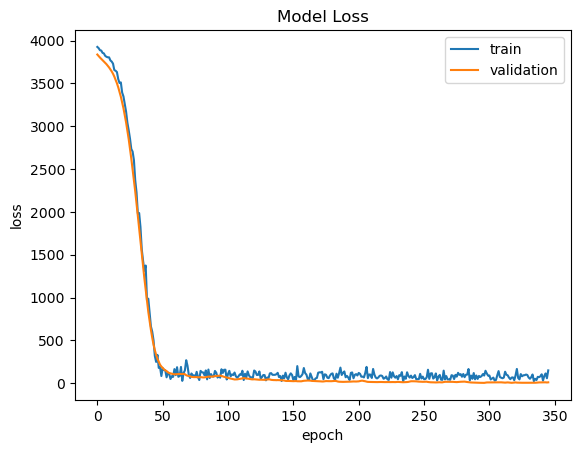

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper right')
plt.show()

In [19]:
PREDICTION = model.predict([x])

1/1 [==============================] - 0s 85ms/step


In [20]:
OUTPUT = pd.DataFrame(zip(y,PREDICTION), columns= ['ACTUAL','PREDICTION'],dtype=float)
OUTPUT.PREDICTION = OUTPUT.PREDICTION.astype(float)
OUTPUT

,ACTUAL,PREDICTION
0,52.21,54.151852
1,53.12,52.057472
2,54.48,52.171135
3,55.84,53.300602
4,57.20,54.221973
5,58.57,55.862007
6,59.93,57.512627
7,61.29,58.613041
8,63.11,60.263660
9,64.47,61.364075


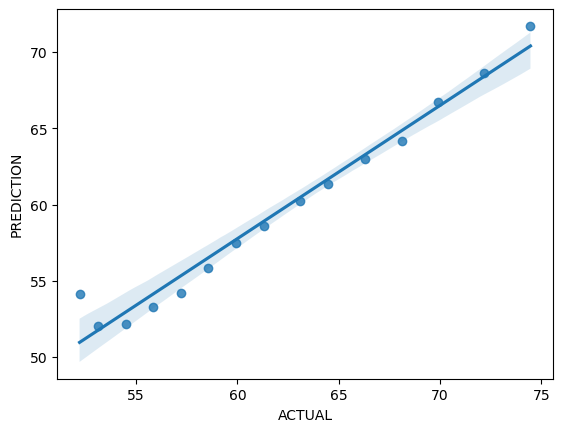

In [21]:
sns.regplot(data = OUTPUT, x = 'ACTUAL',y = 'PREDICTION')
plt.show()